In [ ]:
import os
import numpy as np
import time
import cv2
import pathlib
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import transform, measure, io, color, filters
from skimage import  measure as skm
import matplotlib
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# import splitfolders



drive.mount('/content/gdrive')
DATASET_NAME = 'mnist'

Mounted at /content/gdrive


In [ ]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential(
    [
      keras.Input(shape=input_shape),
      layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'),
      layers.MaxPooling2D(pool_size=(2,2)),
      layers.Flatten(),
      layers.Dropout(0.5),
      layers.Dense(num_classes, activation='softmax'),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, 
                    epochs=15, validation_split=0.1)

model.save('/content/gdrive/MyDrive/diplomovka/models/' + time.strftime("model_%Y_%m_%d_%H_%M") + '_{}'.format(DATASET_NAME))

Epoch 1/15
422/422 [==============================] - 70s 164ms/step - loss: 0.3317 - accuracy: 0.9003 - val_loss: 0.0836 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 65s 154ms/step - loss: 0.1050 - accuracy: 0.9684 - val_loss: 0.0567 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 64s 151ms/step - loss: 0.0790 - accuracy: 0.9759 - val_loss: 0.0459 - val_accuracy: 0.9877
Epoch 4/15
422/422 [==============================] - 63s 149ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0431 - val_accuracy: 0.9868
Epoch 5/15
422/422 [==============================] - 62s 148ms/step - loss: 0.0571 - accuracy: 0.9822 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 6/15
422/422 [==============================] - 62s 146ms/step - loss: 0.0515 - accuracy: 0.9835 - val_loss: 0.0337 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 63s 150ms/step - loss: 0.0469 - accuracy: 0.9854 - val_loss: 0.0342 - val_ac

**Načítanie uloženého modelu**

In [ ]:
model = keras.models.load_model('/content/gdrive/MyDrive/diplomovka/models/model_2022_04_18_19_38_mnist')

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 5s 14ms/step - loss: 0.0256 - accuracy: 0.9917


In [ ]:
test_prediction = model.predict(x_test)

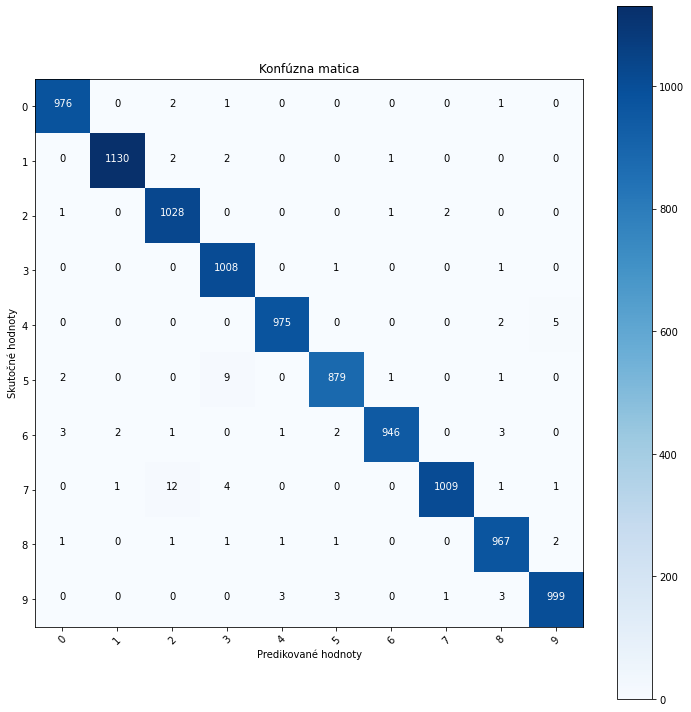

In [ ]:
# short script from https://www.kaggle.com/code/yassineghouzam/introduction-to-cnn-keras-0-997-top-6#4.-Evaluate-the-model

# Look at confusion matrix 


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Konfúzna matica',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    _plt = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Skutočné hodnoty')
    plt.xlabel('Predikované hodnoty')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

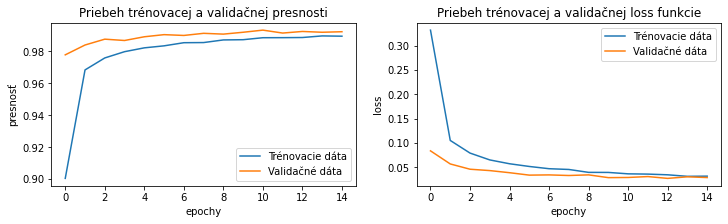

In [ ]:


plt_1 = plt.figure(figsize=(12,3))

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history[ 'val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.subplot(1, 2, 1)
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Priebeh trénovacej a validačnej presnosti')
plt.xlabel('epochy')
plt.ylabel('presnosť')
plt.legend(['Trénovacie dáta', 'Validačné dáta'])
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.subplot(1, 2, 2)
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Priebeh trénovacej a validačnej loss funkcie')
plt.xlabel('epochy')
plt.ylabel('loss')
plt.legend(['Trénovacie dáta', 'Validačné dáta'])

plt.show()

**Spracovanie vstupu a výstupu prvej konvolučnej vrstvy**

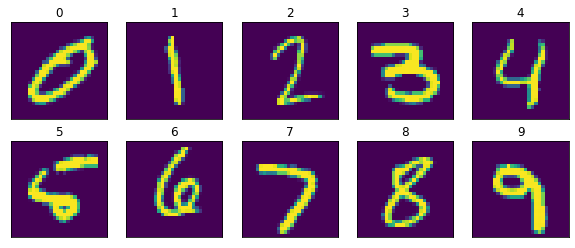

In [ ]:

foo = [9753, 145, 456, 51, 4, 8, 123, 17, 879, 212]

plt_2 = plt.figure(figsize=(10,4))

counter = 1
for _ in range(2):
    for _ in range(5):
        # specify subplot and turn of axis
        ax = plt.subplot(2, 5, counter)
        plt.title(str(np.argmax(y_test[foo[counter-1]])))
        # str(y_test[foo[counter-1]])
        ax.set_xticks([])
        ax.set_yticks([])
        plt.imshow(np.squeeze(x_test[foo[counter-1]], axis=2))
        counter += 1

**Kontrola predikcie referenčných obrázkov**

In [ ]:
for idx in [9753, 145, 456, 51, 4, 8, 123, 17, 879, 212]:
    foo = np.expand_dims(x_test[idx], axis=0)
    bar = y_test[idx].reshape((1,10))
    print(idx)
    print(bar)    
    y_tensor = tf.convert_to_tensor(bar, dtype=tf.float32) 
    model.evaluate(foo , y_tensor)[0]

9753
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 1s 573ms/step - loss: 2.9023e-04 - accuracy: 1.0000
145
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 17ms/step - loss: 5.1342e-04 - accuracy: 1.0000
456
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 16ms/step - loss: 5.5073e-05 - accuracy: 1.0000
51
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step - loss: 1.1921e-07 - accuracy: 1.0000
4
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 24ms/step - loss: 1.1802e-05 - accuracy: 1.0000
8
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 15ms/step - loss: 0.0088 - accuracy: 1.0000
123
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
1/1 [==============================] - 0s 16ms/step - loss: 4.7684e-07 - accuracy: 1.0000
17
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
1/1 [==============================] - 0s 21ms/step - loss: 8.5830e-06 - a

In [ ]:
class FeatureMapsFusion():
    def __init__(self, input_image=None, label=None, trained_model=None, weight_option=None, lfd_type_2=True):
        """Creates final fused image
        Aggregation function: - expected values = ['entropy', 'loss_function_deviation', 'rectified_loss_function_deviation'].
        """
        self.input_image=input_image
        self.label=label
        self.trained_model=trained_model
        self.aggregation_function=None
        self.weight_option=weight_option
        self.measure=None
        self.lfd_type_2=lfd_type_2

        self.loss_to_compare = trained_model.evaluate(input_image, label)[0]
        self.input_shape = (input_image.shape[1], input_image.shape[2])

        self.feature_maps = []
        self.feature_maps_dict = {}
        self.weights={}

        if not weight_option in ['entropy', 'loss_function_deviation']:
            raise ValueError('Not appropriate aggregation function name!')

        self._get_feature_maps_and_weights()
        self._normalize_weights()
        self._sort_weights_and_feature_maps()
        self._normalize_feature_maps()

    def _get_feature_maps_and_weights(self):     

        if self.weight_option == 'entropy':
            print('using entropy')
            layer_outputs = [layer.output for layer in self.trained_model.layers if 'conv2d' in layer.name]
            feature_map_model = tf.keras.models.Model(inputs=self.trained_model.input, outputs=layer_outputs)

            feature_maps = feature_map_model.predict(self.input_image) 

            for img_stack in feature_maps:
                foo = np.squeeze(img_stack, axis=0)
                foo = np.transpose(foo, axes=[2,0,1])
                foo = list(foo)

                ratio = self.input_shape[0] // foo[0].shape[0] #just one axis

                feature_maps_length = len(self.feature_maps)

                #resize feature map if is needed
                for idx, img in enumerate(foo):
                    if not ratio == 1:                 
                             
                        img = np.repeat(img, ratio, axis=0)
                        img = np.repeat(img, ratio, axis=1)
                        img = transform.resize(img, self.input_shape, anti_aliasing=False, order=2)
                    self.feature_maps.append(img)

                    #entropy calculation
                    self.weights[idx + feature_maps_length] = measure.shannon_entropy(img)
              
        else:            
            print('using loss function deviation')
            for idx, layer in enumerate(self.trained_model.layers):
                if 'conv2d' in layer.name:
                    
                    #splitting model
                    head_model_input = keras.Input(self.trained_model.layers[0].input_shape[1:])
                    head_model = head_model_input 
                    for _layer in self.trained_model.layers[0:idx+1]:
                        head_model = _layer(head_model)
                    head_model = keras.Model(inputs=head_model_input, outputs=head_model)
                    head_model.compile(loss=self.trained_model.loss, optimizer=self.trained_model.optimizer,metrics=self.trained_model.metrics)

                    tail_model_input = keras.Input(self.trained_model.layers[idx+1].input_shape[1:])
                    tail_model = tail_model_input
                    for _layer in self.trained_model.layers[idx+1:]:
                        tail_model = _layer(tail_model)
                    tail_model = keras.Model(inputs=tail_model_input, outputs=tail_model)
                    tail_model.compile(loss=self.trained_model.loss, optimizer=self.trained_model.optimizer.get_config()['name'],metrics=[self.trained_model.metrics[1].get_config()['name']])

                    input_data = self.input_image

                    conv_results = head_model.predict(input_data)
                    conv_results = np.squeeze(conv_results, axis=0)
                    conv_results = np.transpose(conv_results, axes=[2,0,1])
                    conv_results = list(conv_results)

                    dummy_copy = conv_results.copy()

                    conv_results_length = len(conv_results)    
                    ratio = self.input_shape[0] // conv_results[0].shape[0]                     

                    for _index in range(0, conv_results_length):
                        if self.lfd_type_2:         
                            conv_results_copy = np.zeros((conv_results_length, *dummy_copy[0].shape), dtype=np.float32)
                            conv_results_copy[_index] = conv_results[_index].copy()
                            conv_results_copy = np.transpose(conv_results_copy, axes=[1,2,0])
                            conv_results_copy = np.expand_dims(conv_results_copy, axis=0)  
                        else:
                            conv_results_copy = dummy_copy.copy()
                            conv_results_copy.pop(_index)
                            conv_results_copy.insert(_index, np.zeros(dummy_copy[0].shape, dtype=np.float32))
                            conv_results_copy = np.array(conv_results_copy)
                            conv_results_copy = np.transpose(conv_results_copy, axes=[1,2,0])
                            conv_results_copy = np.expand_dims(conv_results_copy, axis=0)    
                                                  
                        evaluation = tail_model.evaluate(conv_results_copy, self.label)                       

                        if self.weight_option == 'loss_function_deviation':
                            self.weights[_index+len(self.feature_maps)] = evaluation[0] - self.loss_to_compar

                        #resize
                        if not ratio == 1:
                            img = conv_results[_index].copy()
                            img = np.repeat(img, ratio, axis=0)
                            img = np.repeat(img, ratio, axis=1)
                            img = transform.resize(img, self.input_shape, anti_aliasing=False, order=2)
                            conv_results[_index] = img  
          
                    self.feature_maps.extend(conv_results)

        self.feature_maps_dict = dict(zip(range(len(self.feature_maps)), self.feature_maps)) 

    def _sort_weights_and_feature_maps(self):
        print('feature maps and weights sorting')
        my_dict = dict(sorted(self.weights.items(), reverse=True, key=lambda item: item[1]))

        ordered_images = []
        ordered_images_dict = {}

        for k,v in my_dict.items():
            ordered_images.append(self.feature_maps_dict[k])  
            ordered_images_dict[k] = self.feature_maps_dict[k]

        self.feature_maps = ordered_images
        self.feature_maps_dict = ordered_images_dict
        self.weights = my_dict

    def _normalize_weights(self):
        print('weights normalization')
        all_values = list(self.weights.values())
        max_value = np.max(np.array(all_values))
        min_value = np.min(np.array(all_values))

        for k,v in self.weights.items():
            foo = self.weights[k]
            foo = (foo - min_value) / (max_value - min_value)
            if not self.lfd_type_2:
                self.weights[k] = foo      
            else:
                self.weights[k] = 1.0 - foo

    def _normalize_feature_maps(self):
        print('feature maps normalization')
        max = 0
        min = np.inf
        for value in self.feature_maps:
            if np.max(value) > max:
                max = np.max(value)
            if np.min(value) < min:
                min = np.min(value)
        self.feature_maps = np.array([(value - min) / (max - min) for value in self.feature_maps])

        new_dict = {}
        for key, value in self.feature_maps_dict.items():
            new_dict[key] = (value - min) / (max - min)

        self.feature_maps_dict = new_dict        

    def additive_measure(self, data):
        return sum(data)

    def average_measure(self, data):
        return sum(data)/len(data)

    def possibility_measure(self, data):
        return np.amax(data, axis=0)    

    def distorted_measure(self, data):
        return sum(data) ** 2

    def choquet_integral(self):
        
        summary = np.zeros(self.input_shape)

        for k in range(0, len(self.feature_maps) - 1):
            summary = summary + (self.weights[k] - self.weights[k+1] ) * self.measure(self.feature_maps[:k+1])

        summary = summary + self.weights[len(self.weights)-1] * self.measure(self.feature_maps)       

        return summary 

    def own_integral(self):
        
        summary = np.zeros(self.input_shape)

        for k in range(0, len(self.feature_maps)):
            summary = summary + self.weights[k] * self.measure(self.feature_maps[:k+1])
 
        return summary 

    def sugeno_integral(self):
        
        weights = list(self.weights.values())
        feature_maps = list(self.feature_maps.copy())

        #because sugeno needs accendent order
        weights.reverse()
        feature_maps.reverse()
        feature_maps = np.array(feature_maps)

        summary = np.zeros(self.input_shape)

        if self.measure.__name__  in ['additive_measure', 'possibility_measure','distorted_measure']:
            for k in range(0, len(weights)):
                summary = np.stack((summary, np.stack((np.full(self.input_shape, weights[k]), self.measure(feature_maps[k:])), axis=0 ).min(0)), axis=0).max(0)
            return summary

        else:
            raise ValueError('Not appropriate measure for Sugeno integral!')
            return summary

    def fuse(self, aggregation_function='choquet', measure=None):
        """Creates final fused image
        Aggregation function: - expected values = ['choquet', 'own', 'sugeno']
        """          

        if not aggregation_function in ['choquet', 'own', 'sugeno']:
            raise ValueError('Not appropriate aggregation function name!')

        if not measure in ['additive', 'average', 'possibility','distorted']:
            raise ValueError('Not appropriate measure name!')

        if measure == 'additive' or measure == 'distorted':
            self.mul_coef = self.feature_maps.sum(0)
        elif measure == 'average':
            self.mul_coef = 1
        elif measure == 'possibility':
            self.mul_coef = self.feature_maps.max(0)
        
        self.feature_maps = self.feature_maps / self.mul_coef 
        
        self.aggregation_function=getattr(self, aggregation_function+'_integral')
        self.measure=getattr(self, measure+'_measure')
        
        agr = self.aggregation_function()

        self.feature_maps = self.feature_maps * self.mul_coef 
        agr = agr * self.mul_coef

        return agr


In [ ]:
entropy_fmfs = {}
lossdev_fmfs = {}

for idx in [9753, 145, 456, 51, 4, 8, 123, 17, 879, 212]:
    foo = np.expand_dims(x_test[idx], axis=0)
    bar = y_test[idx].reshape((1,10))
    print(bar)
    y_tensor = tf.convert_to_tensor(bar, dtype=tf.float32)


    fmf_en = FeatureMapsFusion(input_image=foo, label=y_tensor, trained_model=model, weight_option='entropy')
    # fmf_ld = FeatureMapsFusion(input_image=foo, label=y_tensor, trained_model=model, weight_option='loss_function_deviation', lfd_type_2=True)

    entropy_fmfs[idx] = fmf_en
    # lossdev_fmfs[idx] = fmf_ld

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 25ms/step - loss: 2.9023e-04 - accuracy: 1.0000
using entropy
weights normalization
feature maps and weights sorting
feature maps normalization
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 32ms/step - loss: 5.1342e-04 - accuracy: 1.0000


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:178: UserWarning: Bi-quadratic interpolation behavior has changed due to a bug in the implementation of scikit-image. The new version now serves as a wrapper around SciPy's interpolation functions, which itself is not verified to be a correct implementation. Until skimage's implementation is fixed, we recommend to use bi-linear or bi-cubic interpolation instead.
  preserve_range=preserve_range)


using entropy
weights normalization
feature maps and weights sorting
feature maps normalization
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 36ms/step - loss: 5.5073e-05 - accuracy: 1.0000
using entropy
weights normalization
feature maps and weights sorting
feature maps normalization
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 41ms/step - loss: 1.1921e-07 - accuracy: 1.0000
using entropy
weights normalization
feature maps and weights sorting
feature maps normalization
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 28ms/step - loss: 1.1802e-05 - accuracy: 1.0000
using entropy
weights normalization
feature maps and weights sorting
feature maps normalization
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
1/1 [==============================] - 0s 26ms/step - loss: 0.0088 - accuracy: 1.0000
using entropy
weights normalization
feature maps and weights sorting
feature maps normalization
[[0. 0. 0. 0. 0. 0. 1. 0. 0.

**Workflow**

In [ ]:


def euklidean_distance(mask_A, mask_B):
    return np.sqrt(np.sum((mask_A - mask_B)**2))

def pearson_corr_coef(mask_A, mask_B): #masky aj histogramy
    A_squared = mask_A **2 
    B_squared = mask_B **2 
    A_B = mask_A * mask_B

    sigma_A_B = np.average(A_B) - np.average(mask_A) * np.average(mask_B)
    sigma_A = np.sqrt(np.average(A_squared)-np.average(mask_A)**2)
    sigma_B = np.sqrt(np.average(B_squared)-np.average(mask_B)**2)

    return sigma_A_B / (sigma_A * sigma_B)

def get_histogram(mask):
    hist, _ = np.histogram(mask, bins=256, range=(0, 1))
    return hist

def auc_roc(mask_A, mask_B):
    '''
    Mask_A by mala byt ground truth.
    sklearn.metrics.cm - Thus in binary classification, the count of true negatives is C_0_0, false negatives is C_1_0,  true positives is C_1_1 and false positives is C_0_1.
    '''
    roc_points = []
    for threshold in range(1, 20):
        threshold = threshold / 20
        thres_A = mask_A > threshold
        thres_B = mask_B > threshold

        cm = metrics.confusion_matrix(thres_A.flatten(),thres_B.flatten())
        tp, fp, tn, fn = cm[1][1], cm[0][1], cm[0][0], cm[1][0]

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        roc_points.append((fpr, tpr))

    roc_points = sorted(roc_points, key=lambda x: x[0])
    roc_points = [(0,0)] + roc_points + [(1,1)]

    auc = 0

    for idx in range(1, len(roc_points)):
        x_diff = roc_points[idx][0] - roc_points[idx-1][0]
        y_diff = roc_points[idx][1] - roc_points[idx-1][1]

        auc = auc + (x_diff * roc_points[idx-1][1]) + ((x_diff * y_diff) / 2)

    return auc

def get_resutls_and_compare_them_all(entropy_fmfs, lossdev_fmfs, measure):

    choq_ent, own_ent, sug_ent, choq_ld, own_ld, sug_ld = {}, {}, {}, {}, {}, {}

    for exp in [choq_ent, own_ent, sug_ent, choq_ld, own_ld, sug_ld]:
        exp['ed'] = []
        exp['en'] = []
        exp['pcch'] = [] 
        exp['pccm'] = []
        exp['auc'] = []        

    for key, value in entropy_fmfs.items():
        print("obrazok: {}".format(key))
        for agg, my_dict in [('choquet',choq_ent),('own',own_ent),('sugeno',sug_ent)]:
            result = value.fuse(aggregation_function=agg, measure=measure)           
            max = np.max(result)
            min = np.min(result)
            result = (result - min) / (max - min)
            
            image = np.squeeze(x_test[key], axis=2)
            image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
            saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
            (success, saliencyMap) = saliency.computeSaliency(image)
            saliencyMap = (saliencyMap * 255).astype("uint8")
            max = np.max(saliencyMap)
            min = np.min(saliencyMap)
            opencv_mask = (saliencyMap - min) / (max - min)

            my_dict['ed'].append(euklidean_distance(opencv_mask, result))
            my_dict['en'].append(skm.shannon_entropy(result))
            my_dict['pcch'].append(pearson_corr_coef(get_histogram(opencv_mask), get_histogram(result)))
            my_dict['pccm'].append(pearson_corr_coef(opencv_mask, result))
            my_dict['auc'].append(auc_roc(opencv_mask, result))

        # continue
        sec_value = lossdev_fmfs[key]

        for agg, my_dict in [('choquet',choq_ld),('own',own_ld),('sugeno',sug_ld)]:
            result = sec_value.fuse(aggregation_function=agg, measure=measure)
            max = np.max(result)
            min = np.min(result)
            result = (result - min) / (max - min)

            image = np.squeeze(x_test[key], axis=2)
            image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
            saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
            (success, saliencyMap) = saliency.computeSaliency(image)
            saliencyMap = (saliencyMap * 255).astype("uint8")
            max = np.max(saliencyMap)
            min = np.min(saliencyMap)
            opencv_mask = (saliencyMap - min) / (max - min)

            my_dict['ed'].append(euklidean_distance(opencv_mask, result))
            my_dict['en'].append(skm.shannon_entropy(result))
            my_dict['pcch'].append(pearson_corr_coef(get_histogram(opencv_mask), get_histogram(result)))
            my_dict['pccm'].append(pearson_corr_coef(opencv_mask, result))
            my_dict['auc'].append(auc_roc(opencv_mask, result))

    return choq_ent, own_ent, sug_ent, choq_ld, own_ld, sug_ld

choq_ent, own_ent, sug_ent, choq_ld, own_ld, sug_ld = get_resutls_and_compare_them_all(entropy_fmfs, lossdev_fmfs, 'distorted')

    
# for measure in ['additive', 'average', 'possibility','distorted']:
#     get_resutls_and_compare_them_all(entropy_fmfs, lossdev_fmfs, measure):

obrazok: 9753
obrazok: 145
obrazok: 456
obrazok: 51
obrazok: 4
obrazok: 8
obrazok: 123
obrazok: 17
obrazok: 879
obrazok: 212


In [ ]:
def get_resutls_and_compare_them_all(fmf_en, original_image, agg_function, measure):

    results = {}

    for key in ['ed', 'pcch', 'pccm', 'auc']:
        results[key] = []
        results[key] = [] 
        results[key] = []
        results[key] = []        

    result = fmf_en.fuse(aggregation_function=agg_function, measure=measure)           
    max = np.max(result)
    min = np.min(result)
    result = (result - min) / (max - min)
    
    image = np.squeeze(original_image, axis=2)
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
    saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
    (success, saliencyMap) = saliency.computeSaliency(image)
    saliencyMap = (saliencyMap * 255).astype("uint8")
    max = np.max(saliencyMap)
    min = np.min(saliencyMap)
    opencv_mask = (saliencyMap - min) / (max - min)

    results['ed'].append(euklidean_distance(opencv_mask, result))
    results['pcch'].append(pearson_corr_coef(get_histogram(opencv_mask), get_histogram(result)))
    results['pccm'].append(pearson_corr_coef(opencv_mask, result))
    results['auc'].append(auc_roc(opencv_mask, result))

    
    return results

resuults = get_resutls_and_compare_them_all(fmf_en, original_image, 'sugeno', 'distorted')

In [ ]:
print(round(sum(choq_ld['ed'])/10, 6)) 
print(round(sum(choq_ld['en'])/10, 6)) 
print(round(sum(choq_ld['pcch'])/10, 6)) 
print(round(sum(choq_ld['pccm'])/10, 6)) 
print(round(sum(choq_ld['auc'])/10, 6)) 

5.657168
6.861204
0.220475
0.696373
0.895268


[]

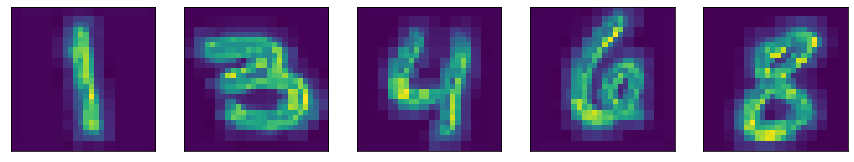

In [ ]:
result = {}
result[145] = entropy_fmfs[145].fuse(aggregation_function='sugeno', measure='distorted')
result[51]  = entropy_fmfs[51].fuse(aggregation_function='sugeno', measure='distorted')
result[4]   = entropy_fmfs[4].fuse(aggregation_function='sugeno', measure='distorted')
result[123] = entropy_fmfs[123].fuse(aggregation_function='sugeno', measure='distorted')
result[879] = entropy_fmfs[879].fuse(aggregation_function='sugeno', measure='distorted')
# [145, 51, 4, 123, 879]
# result = {}
# result[145] = np.squeeze(x_test[145], axis=2)
# result[51]  = np.squeeze(x_test[51], axis=2)
# result[4]   = np.squeeze(x_test[4], axis=2)
# result[123] = np.squeeze(x_test[123], axis=2)
# result[879] = np.squeeze(x_test[879], axis=2)


# image = np.squeeze(x_test[9753], axis=2)
# image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
# saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
# (success, saliencyMap) = saliency.computeSaliency(image)
# saliencyMap = (saliencyMap * 255).astype("uint8")
# max = np.max(saliencyMap)
# min = np.min(saliencyMap)
# opencv_mask = (saliencyMap - min) / (max - min)

f, axarr = plt.subplots(1,5, figsize=(15, 3))
axarr[0].imshow(result[145])
# axarr[0].set_title("Opencv maska")
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[1].imshow(result[51])
# axarr[1].set_title("Entropia a  Choquet")
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[2].imshow(result[4])
# axarr[2].set_title("Entropia a vlastná")
axarr[2].set_xticks([])
axarr[2].set_yticks([])
axarr[3].imshow(result[123])
# axarr[3].set_title("Entropia a Sugeno")
axarr[3].set_xticks([])
axarr[3].set_yticks([])
axarr[4].imshow(result[879])
# axarr[4].set_title("Odchýlka lossu a Choquet")
axarr[4].set_xticks([])
axarr[4].set_yticks([])
# axarr[5].imshow(result_5)
# axarr[5].set_title("Odchýlka lossu a vlastná")
# axarr[5].set_xticks([])
# axarr[5].set_yticks([])
# axarr[6].imshow(result_6)
# axarr[6].set_title("Odchýlka lossu a Sugeno")
# axarr[6].set_xticks([])
# axarr[6].set_yticks([])
# print(measure.shannon_entropy(result_6))

In [ ]:
result = {}
result[145] = entropy_fmfs[145].fuse(aggregation_function='sugeno', measure='distorted')
result[51]  = entropy_fmfs[51].fuse(aggregation_function='sugeno', measure='distorted')
result[4]   = entropy_fmfs[4].fuse(aggregation_function='sugeno', measure='distorted')
result[123] = entropy_fmfs[123].fuse(aggregation_function='sugeno', measure='distorted')
result[879] = entropy_fmfs[879].fuse(aggregation_function='sugeno', measure='distorted')

f, axarr = plt.subplots(1,5, figsize=(15, 3))
axarr[0].imshow(result[145])
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[1].imshow(result[51])
axarr[1].set_xticks([])
axarr[1].set_yticks([])
axarr[2].imshow(result[4])
axarr[2].set_xticks([])
axarr[2].set_yticks([])
axarr[3].imshow(result[123])
axarr[3].set_xticks([])
axarr[3].set_yticks([])
axarr[4].imshow(result[879])
axarr[4].set_xticks([])
axarr[4].set_yticks([])